In [76]:
!pip install plotly==4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [0]:
# Utilities
from tqdm.auto import tqdm
tqdm.pandas()
import numpy as np
import pandas as pd

# visualizations
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from wordcloud import WordCloud
import plotly.express as px

# NLP
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(["from", "subject", "re", "edu", "use",
                   "-PRON-","pron","hospital","patient","good","many","much",
                   "service","department","ramathibodhi","siriraj","chulalongkorn"])
from sklearn.feature_extraction.text import CountVectorizer

# download
from google.colab import files

PATH = "/content/drive/My Drive/sen_ana/"

In [0]:
# wordcloud
def word_cloud(hosp,sen):
  if hosp == "rama":
    name = "ramathibodi-hospital"
  if hosp == "sriraj":
    name = "siriraj-hospital"
  if hosp == "chula":
    name = "king-chulalongkorn-memorial-hospital"
  if sen == "positive":
    color = "white"
    word = " ".join(df_pos.loc[df_pos.hospital == name].en.astype(str))
  if sen == "negative":
    color = "black"
    word = " ".join(df_neg.loc[df_neg.hospital == name].en.astype(str))
  wordcloud = WordCloud(background_color=color, 
                          stopwords=stop_words, min_font_size = 7,
                          max_words=1000,
                          collocations=False).generate(word)
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud)

# radar plot
cv = CountVectorizer(lowercase=True,stop_words=stop_words,ngram_range = (1,1))
def radar(hosp,sen):
  if hosp == "rama":
    name = "ramathibodi-hospital"
  if hosp == "sriraj":
    name = "siriraj-hospital"
  if hosp == "chula":
    name = "king-chulalongkorn-memorial-hospital"
  if sen == "positive":
    data_cv= cv.fit_transform(df_pos[df_pos.hospital.isin([name])].en.astype(str))
  if sen == "negative":
    data_cv= cv.fit_transform(df_neg[df_neg.hospital.isin([name])].en.astype(str))
  word_count = pd.DataFrame({'word': cv.get_feature_names(), 'count': np.asarray(data_cv.sum(axis=0))[0]})
  # only top ten
  word_count = word_count.sort_values(by="count",ascending=False)[:10]
  r = word_count.loc[word_count.word.isin(word_count.word)].reset_index()
  fig = px.line_polar(r, r='count', theta='word')
  fig.update_traces(fill='toself')
  fig.write_image("/content/"+hosp+"_"+sen+"_rd.svg")
  fig.show()

In [0]:
# already lemmenizaed
df = pd.read_csv(PATH+"word_clean.csv")

# positive and negative ratings
df_pos = df.loc[(df.score==4) | (df.score==5)]
df_neg = df.loc[(df.score==1) | (df.score==2)]

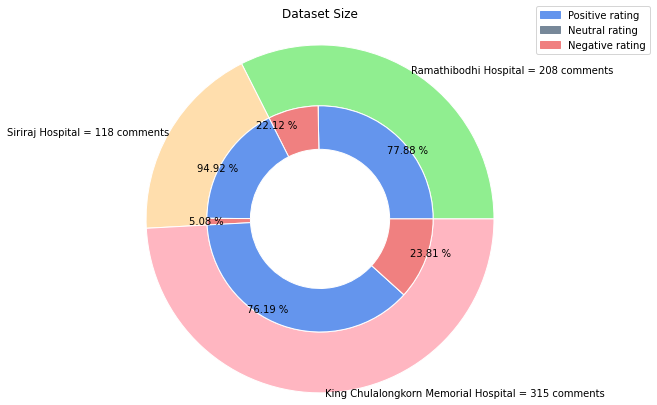

In [81]:
rama = len(df[df.hospital.isin(["ramathibodi-hospital"])])
sriraj = len(df[df.hospital.isin(["siriraj-hospital"])])
chula = len(df[df.hospital.isin(["king-chulalongkorn-memorial-hospital"])])
rama_pos = len(df_pos[df_pos.hospital.isin(["ramathibodi-hospital"])])
rama_neu = len(df[(df.hospital.isin(["ramathibodi-hospital"])) & (df.score==3)])
rama_neg = len(df_neg[df_neg.hospital.isin(["ramathibodi-hospital"])])
sriraj_pos = len(df_pos[df_pos.hospital.isin(["siriraj-hospital"])])
sriraj_neu = len(df[(df.hospital.isin(["siriraj-hospital"])) & (df.score==3)])
sriraj_neg = len(df_neg[df_neg.hospital.isin(["siriraj-hospital"])])
chula_pos = len(df_pos[df_pos.hospital.isin(["king-chulalongkorn-memorial-hospital"])])
chula_neu = len(df[(df.hospital.isin(["king-chulalongkorn-memorial-hospital"])) & (df.score==3)])
chula_neg = len(df_neg[df_neg.hospital.isin(["king-chulalongkorn-memorial-hospital"])])

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie([rama,sriraj,chula], radius=2, labels=["Ramathibodhi Hospital = "+str(rama)+" comments", "Siriraj Hospital = "+str(sriraj)+" comments","King Chulalongkorn Memorial Hospital = "+str(chula)+" comments"], labeldistance=1,colors=["lightgreen", "navajowhite", "lightpink"])
plt.setp( mypie, width=0.7, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie([rama_pos,rama_neu,rama_neg,sriraj_pos,sriraj_neu,sriraj_neg,chula_pos,chula_neu,chula_neg], radius=2-0.7, labels=["{:.2f}".format((rama_pos/rama)*100)+" %"," ","{:.2f}".format((rama_neg/rama)*100)+" %","{:.2f}".format((sriraj_pos/sriraj)*100)+" %"," ","{:.2f}".format((sriraj_neg/sriraj)*100)+" %","{:.2f}".format((chula_pos/chula)*100)+" %"," ","{:.2f}".format((chula_neg/chula)*100)+" %"], labeldistance=0.85, colors=["cornflowerblue", "lightslategrey", "lightcoral","cornflowerblue", "lightslategrey", "lightcoral","cornflowerblue", "lightslategrey", "lightcoral"])
plt.setp( mypie2, width=0.5, edgecolor='white')
plt.margins(0,0)

pos = mpatches.Patch(color="cornflowerblue",   label="Positive rating")
neu = mpatches.Patch(color="lightslategrey", label="Neutral rating")
neg = mpatches.Patch(color="lightcoral", label="Negative rating")
plt.legend(handles=[pos,neu,neg], bbox_to_anchor=(1.5, 1.5))

plt.title("Dataset Size",y=1.4)
plt.savefig("data_size.svg", bbox_inches = "tight", format="svg")
plt.show()


files.download("data_size.svg")

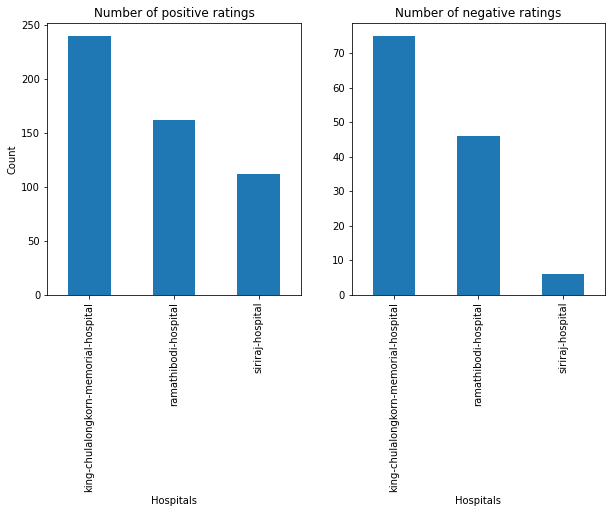

In [82]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
ax = df_pos["hospital"].value_counts().plot(kind='bar',
                                    title="Number of positive ratings")
ax.set_xlabel("Hospitals")
ax.set_ylabel("Count")

plt.subplot(1, 2, 2)
ax = df_neg["hospital"].value_counts().plot(kind='bar',
                                    title="Number of negative ratings")
ax.set_xlabel("Hospitals")
plt.savefig("ratings.svg", bbox_inches = "tight", format="svg")
plt.show()


files.download("ratings.svg")

# Wordclouds

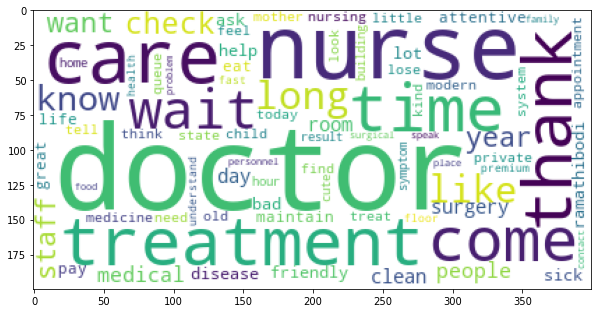

In [83]:
word_cloud(hosp="rama",sen="positive")
plt.savefig("rama_pos_wc.svg", bbox_inches = "tight", format="svg")
files.download("rama_pos_wc.svg")

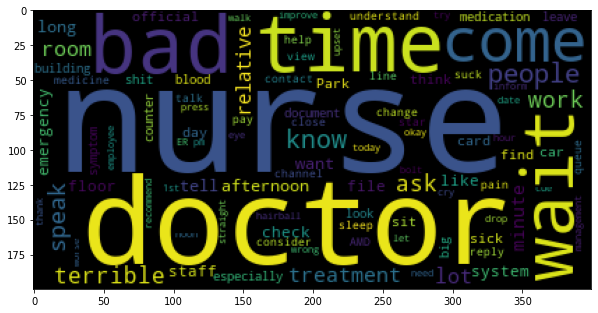

In [84]:
word_cloud(hosp="rama",sen="negative")
plt.savefig("rama_neg_wc.svg", bbox_inches = "tight", format="svg")
files.download("rama_neg_wc.svg")

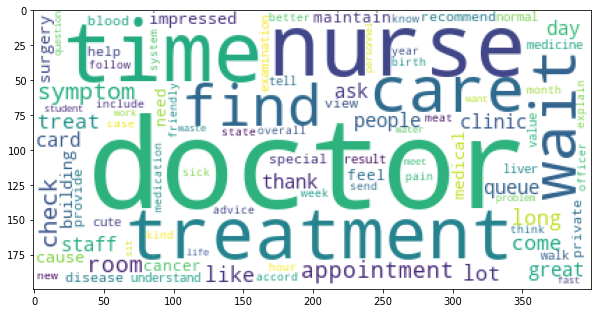

In [85]:
word_cloud(hosp="sriraj",sen="positive")
plt.savefig("sriraj_pos_wc.svg", bbox_inches = "tight", format="svg")
files.download("sriraj_pos_wc.svg")

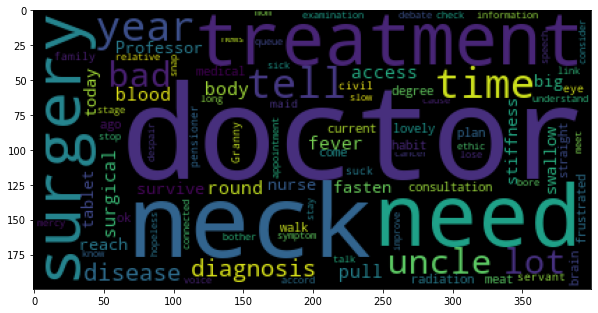

In [86]:
word_cloud(hosp="sriraj",sen="negative")
plt.savefig("sriraj_neg_wc.svg", bbox_inches = "tight", format="svg")
files.download("sriraj_neg_wc.svg")

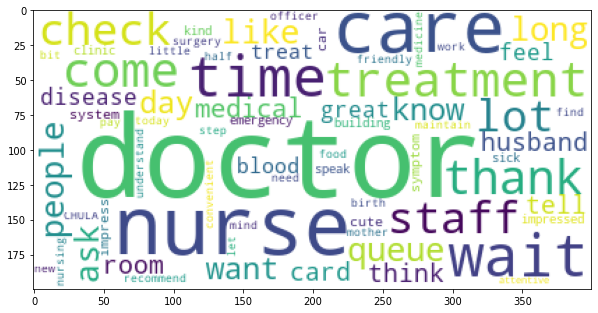

In [87]:
word_cloud(hosp="chula",sen="positive")
plt.savefig("chula_pos_wc.svg", bbox_inches = "tight", format="svg")
files.download("chula_pos_wc.svg")

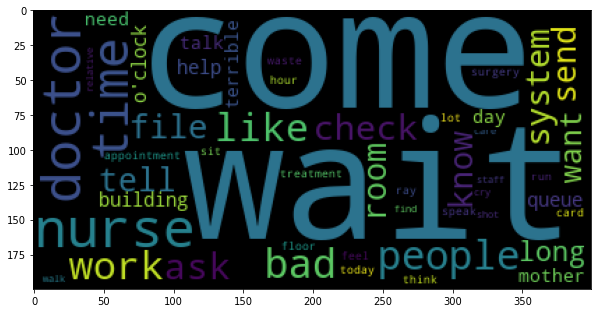

In [88]:
word_cloud(hosp="chula",sen="negative")
plt.savefig("chula_neg_wc.svg", bbox_inches = "tight", format="svg")
files.download("chula_neg_wc.svg")

# Radar Plot

In [89]:
radar(hosp="rama",sen="positive")
files.download("rama_positive_rd.svg")

In [97]:
radar(hosp="rama",sen="negative")
files.download("rama_negative_rd.svg")

In [91]:
radar(hosp="sriraj",sen="positive")
files.download("sriraj_positive_rd.svg")

In [92]:
radar(hosp="sriraj",sen="negative")
files.download("sriraj_negative_rd.svg")

In [96]:
radar(hosp="chula",sen="positive")
files.download("chula_positive_rd.svg")

In [94]:
radar(hosp="chula",sen="negative")
files.download("chula_negative_rd.svg")